# 0. 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.stats as stats
from IPython.display import display
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [ ]:
from google.colab import files
files.upload();

Saving vgames2.csv to vgames2.csv


In [ ]:
df = pd.read_csv('vgames2.csv')
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
# 결측치 제거, 중복치 없음
df.dropna(inplace=True)
print(df.duplicated().sum())
df.info()

0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16241 non-null  int64  
 1   Name         16241 non-null  object 
 2   Platform     16241 non-null  object 
 3   Year         16241 non-null  float64
 4   Genre        16241 non-null  object 
 5   Publisher    16241 non-null  object 
 6   NA_Sales     16241 non-null  object 
 7   EU_Sales     16241 non-null  object 
 8   JP_Sales     16241 non-null  object 
 9   Other_Sales  16241 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.4+ MB


# 1. 데이터 전처리

## 1-1 Year 칼럼 데이터 정제 

In [ ]:
df['Year'].sort_values()

9276        0.0
16394       0.0
14666       0.0
2249        1.0
8681        1.0
          ...  
1786     2016.0
10107    2017.0
5310     2017.0
15233    2017.0
6906     2020.0
Name: Year, Length: 16241, dtype: float64

In [ ]:
a = df.query('Year < 90')
a['Year'].sort_values()
# 16이하의 년수는 지우고 86같은 경우는 원래 1986인데 19가 빠진 것으로 예상

16394     0.0
14666     0.0
9276      0.0
8681      1.0
2249      1.0
         ... 
6192     16.0
15447    16.0
11263    16.0
8191     16.0
4365     86.0
Name: Year, Length: 87, dtype: float64

In [ ]:
index1 = df[df['Year'] <= 16].index
df.drop(index1, inplace=True)
df.shape

(16155, 10)

In [ ]:
# 년수에 19가 빠진것으로 예상되는 것에 19추가하고 int로변경
def fix(df):
  for i, Year in enumerate(df.Year):
    if Year < 100:
      df.iloc[i, 3] = df.iloc[i, 3] + 1900

  return df

fix(df)
df['Year'].sort_values()
df['Year'] = df['Year'].astype('int')

In [ ]:
index1 = df[df['Year'] > 2016].index

In [ ]:
df.drop(index1, inplace=True)

In [ ]:
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


## 1-2  Platform 칼럼 데이터 정제

In [ ]:
# 2600 → Atari2600으로 변경
df['Platform'].replace('2600', 'Atari2600', inplace=True)
df;

## 1-3 NA_Sales, EU_Sales, JP_Sales,  Other_Sales 칼럼 데이터 정제

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16151 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   16151 non-null  int64 
 1   Name         16151 non-null  object
 2   Platform     16151 non-null  object
 3   Year         16151 non-null  int64 
 4   Genre        16151 non-null  object
 5   Publisher    16151 non-null  object
 6   NA_Sales     16151 non-null  object
 7   EU_Sales     16151 non-null  object
 8   JP_Sales     16151 non-null  object
 9   Other_Sales  16151 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.4+ MB


In [ ]:
# K, M 이 들어있는 행을 추출
df[df['NA_Sales'].str.contains('K|M')];

In [ ]:
# K는 지우고 0.001곱해서 단위 맞추기, M은 지우기
def cleaning_NA(df) :
    list = []
    for i, row in enumerate(df.NA_Sales):
        if 'K' in row :
            result = df.iloc[i, 6].replace('K', '')
            list.append((float(result) * 0.001))
        elif 'M' in row :
            result = df.iloc[i, 6].replace('M', '')
            list.append(float(result))
        else :
            result = df.iloc[i, 6]
            list.append(float(result))
        
    df['NA_Sales'] = list

def cleaning_EU(df) :
    list = []
    for i, row in enumerate(df.EU_Sales):
        if 'K' in row :
            result = df.iloc[i, 7].replace('K', '')
            list.append((float(result) * 0.001))
        elif 'M' in row :
            result = df.iloc[i, 7].replace('M', '')
            list.append(float(result))
        else :
            result = df.iloc[i, 7]
            list.append(float(result))
        
    df['EU_Sales'] = list

def cleaning_JP(df) :
    list = []
    for i, row in enumerate(df.JP_Sales):
        if 'K' in row :
            result = df.iloc[i, 8].replace('K', '')
            list.append((float(result) * 0.001))
        elif 'M' in row :
            result = df.iloc[i, 8].replace('M', '')
            list.append(float(result))
        else :
            result = df.iloc[i, 8]
            list.append(float(result))
        
    df['JP_Sales'] = list

def cleaning_Oth(df) :
    list = []
    for i, row in enumerate(df.Other_Sales):
        if 'K' in row :
            result = df.iloc[i, 9].replace('K', '')
            list.append((float(result) * 0.001))
        elif 'M' in row :
            result = df.iloc[i, 9].replace('M', '')
            list.append(float(result))
        else :
            result = df.iloc[i, 9]
            list.append(float(result))
        
    df['Other_Sales'] = list


In [ ]:
cleaning_NA(df)
cleaning_EU(df)
cleaning_JP(df)
cleaning_Oth(df)

In [ ]:
# Grobal_Sales 칼럼 추가
df['Grobal_Sales'] = df.iloc[:, 6:].sum(axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16151 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    16151 non-null  int64  
 1   Name          16151 non-null  object 
 2   Platform      16151 non-null  object 
 3   Year          16151 non-null  int64  
 4   Genre         16151 non-null  object 
 5   Publisher     16151 non-null  object 
 6   NA_Sales      16151 non-null  float64
 7   EU_Sales      16151 non-null  float64
 8   JP_Sales      16151 non-null  float64
 9   Other_Sales   16151 non-null  float64
 10  Grobal_Sales  16151 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [ ]:
df = df.iloc[:, 1:]
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Grobal_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


# 2. 지역에 따라 선호하는 게임 장르

In [ ]:
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')

In [ ]:
df_genre_region = df.groupby('Genre')[['NA_Sales', 'EU_Sales','JP_Sales','Other_Sales']].mean()

In [ ]:
df_genre_region 

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.265245,0.158807,0.048371,0.056902
Adventure,0.080466,0.050300,0.040941,0.013194
Fighting,0.264874,0.120000,0.104320,0.043442
Misc,0.235961,0.124285,0.062065,0.043411
Platform,0.511165,0.230185,0.150254,0.059008
Puzzle,0.216846,0.090305,0.100699,0.022204
Racing,0.292007,0.193419,0.046507,0.062956
Role-Playing,0.211052,0.121175,0.231072,0.037601
Shooter,0.449874,0.242128,0.029913,0.079448


## 2-1 ANOVA 검정으로 지역에 따라 차이가 존재하는지 확인

### 귀무가설 : 지역별로 장르에 따라 출고량의 차이가 없다.
### 대립가설 : 지역별로 장르에 따라 출고량의 차이가 있다.

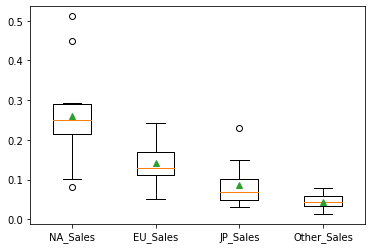

In [ ]:
plt.boxplot([df_genre_region['NA_Sales'] , df_genre_region['EU_Sales'], df_genre_region['JP_Sales'], df_genre_region['Other_Sales']], 
            labels=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], showmeans=True)
plt.show()

In [ ]:
# 정규성 검정
print(stats.shapiro(df_genre_region['NA_Sales']))
print(stats.shapiro(df_genre_region['EU_Sales']))
print(stats.shapiro(df_genre_region['JP_Sales']))
print(stats.shapiro(df_genre_region['Other_Sales']))

ShapiroResult(statistic=0.9102315306663513, pvalue=0.21481047570705414)
ShapiroResult(statistic=0.9609997868537903, pvalue=0.798004150390625)
ShapiroResult(statistic=0.8173713088035583, pvalue=0.014865078032016754)
ShapiroResult(statistic=0.9590219855308533, pvalue=0.7697812914848328)


In [ ]:
# ANOVA 검정실행
F_statistic, pVal = stats.f_oneway(df_genre_region['NA_Sales'], df_genre_region['EU_Sales'], 
                                   df_genre_region['JP_Sales'], df_genre_region['Other_Sales'])

print(f'ANOVA 결과 : F={F_statistic}, p={pVal}')
if pVal < 0.05:
    print('P-value가 충분히 작기 때문에 귀무가설을 기각한다.')

ANOVA 결과 : F=19.240425738016945, p=4.053688301473151e-08
P-value가 충분히 작기 때문에 귀무가설을 기각한다.


## 2-2 시각화로 확인하기

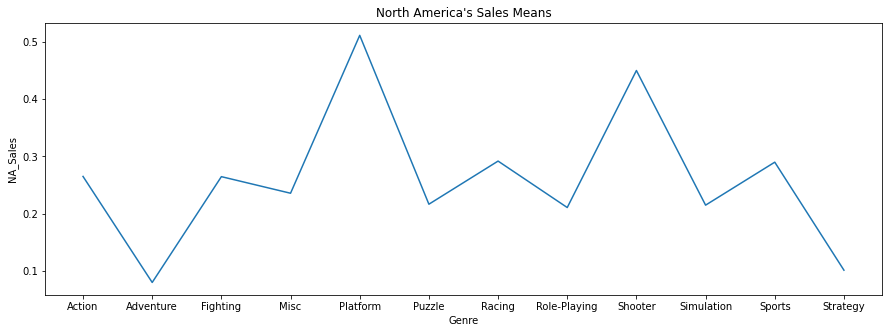

In [ ]:
plt.figure(figsize=(15,5))
plt.title("North America's Sales Means")
sns.lineplot(data=df_genre_region, x='Genre', y='NA_Sales')
plt.savefig('1.png')

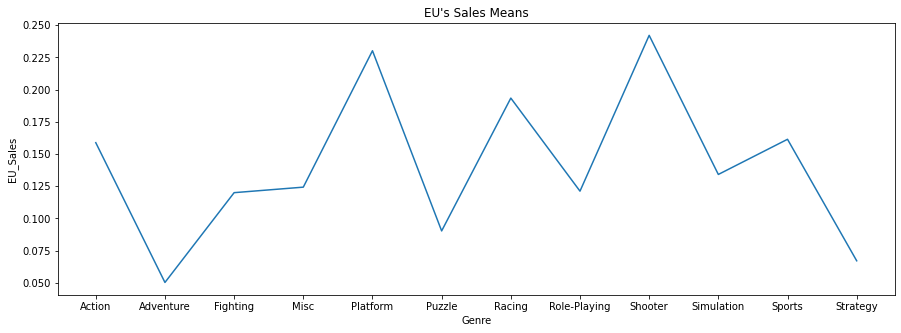

In [ ]:
plt.figure(figsize=(15,5))
plt.title("EU's Sales Means")
sns.lineplot(data=df_genre_region, x='Genre', y='EU_Sales')
plt.savefig('2_유럽 장르별 출고액 평균.png')

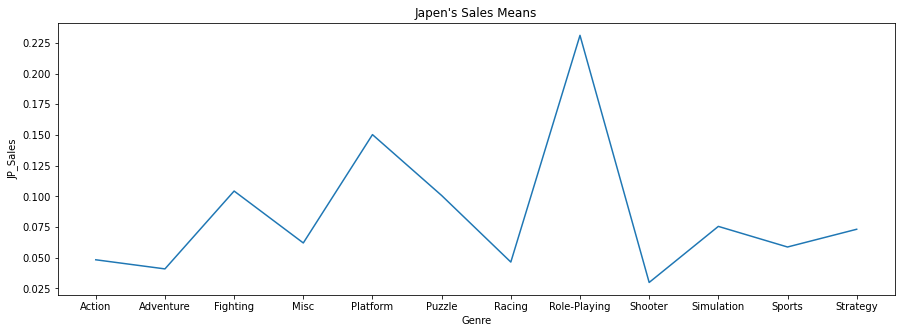

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Japen's Sales Means")
sns.lineplot(data=df_genre_region, x='Genre', y='JP_Sales')
plt.savefig('3_일본 장르별 출고액 평균.png')

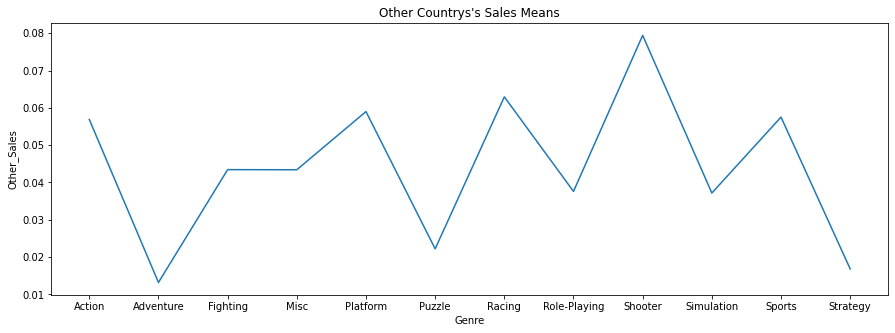

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Other Countrys's Sales Means")
sns.lineplot(data=df_genre_region, x='Genre', y='Other_Sales')
plt.savefig('4_그외 장르별 출고액 평균.png')

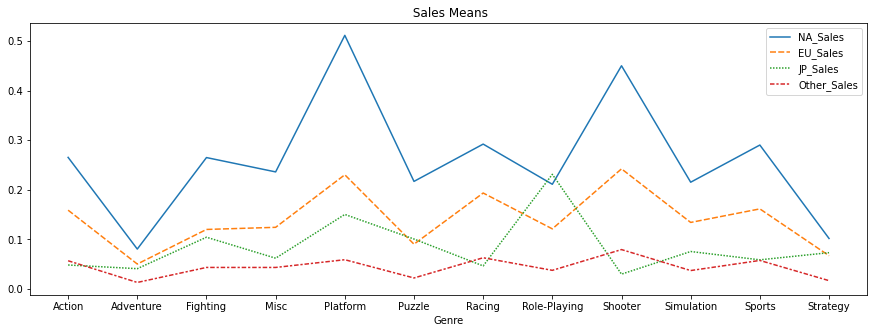

In [ ]:
plt.figure(figsize=(15,5))
plt.title(" Sales Means")
sns.lineplot(data=df_genre_region)
plt.savefig('5_지역별 장르별 출고액 평균.png')

# 3. 연도별 게임의 트렌드

## 3-1 연도별 가장 많이 출시된 게임의 장르

In [ ]:
df['Platform'].value_counts()

DS           2110
PS2          2109
PS3          1291
Wii          1279
X360         1226
PSP          1186
PS           1183
PC            929
XB            794
GBA           780
GC            538
3DS           494
PSV           402
PS4           331
N64           313
SNES          239
XOne          212
SAT           173
WiiU          143
Atari2600     115
NES            98
GB             96
DC             52
GEN            27
NG             12
SCD             6
WS              6
3DO             3
TG16            2
GG              1
PCFX            1
Name: Platform, dtype: int64

In [ ]:
# 빈도수가 10이하인 데이터는 제거
df_for_3 = df[~df['Platform'].str.contains('SCD|WS|3DO|TG16|GG|PCFX')]

In [ ]:
df_for_3['Platform'].value_counts()

DS           2110
PS2          2109
PS3          1291
Wii          1279
X360         1226
PSP          1186
PS           1183
PC            929
XB            794
GBA           780
GC            538
3DS           494
PSV           402
PS4           331
N64           313
SNES          239
XOne          212
SAT           173
WiiU          143
Atari2600     115
NES            98
GB             96
DC             52
GEN            27
NG             12
Name: Platform, dtype: int64

In [ ]:
df_for_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16132 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16132 non-null  object 
 1   Platform      16132 non-null  object 
 2   Year          16132 non-null  int64  
 3   Genre         16132 non-null  object 
 4   Publisher     16132 non-null  object 
 5   NA_Sales      16132 non-null  float64
 6   EU_Sales      16132 non-null  float64
 7   JP_Sales      16132 non-null  float64
 8   Other_Sales   16132 non-null  float64
 9   Grobal_Sales  16132 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
# 연도별 출시된 게임의 장르 개수
df_genre_year = df_for_3.groupby(['Year', 'Genre']).size().reset_index()
df_genre_year.rename(columns = {0:'counts'}, inplace=True)
df_genre_year

,Year,Genre,counts
0,1980,Action,1
1,1980,Fighting,1
2,1980,Misc,4
3,1980,Shooter,2
4,1981,Action,25
...,...,...,...
380,2016,Role-Playing,40
381,2016,Shooter,31
382,2016,Simulation,9
383,2016,Sports,37


In [ ]:
type(df_genre_year)

pandas.core.frame.DataFrame

In [ ]:
df_max = df_genre_year.groupby('Year')['counts'].transform('max')
df_max 

0        4
1        4
2        4
3        4
4       25
      ... 
380    117
381    117
382    117
383    117
384    117
Name: counts, Length: 385, dtype: int64

In [ ]:
df_genre_year['Max'] = df_max 
df_genre_year

,Year,Genre,counts,Max
0,1980,Action,1,4
1,1980,Fighting,1,4
2,1980,Misc,4,4
3,1980,Shooter,2,4
4,1981,Action,25,25
...,...,...,...,...
380,2016,Role-Playing,40,117
381,2016,Shooter,31,117
382,2016,Simulation,9,117
383,2016,Sports,37,117


In [ ]:
df_genre_year['compare'] = df_genre_year['counts'] == df_genre_year['Max']
df_genre_year

,Year,Genre,counts,Max,compare
0,1980,Action,1,4,False
1,1980,Fighting,1,4,False
2,1980,Misc,4,4,True
3,1980,Shooter,2,4,False
4,1981,Action,25,25,True
...,...,...,...,...,...
380,2016,Role-Playing,40,117,False
381,2016,Shooter,31,117,False
382,2016,Simulation,9,117,False
383,2016,Sports,37,117,False


In [ ]:
df_genre_year_max = df_genre_year[df_genre_year['compare']==True]

In [ ]:
df_genre_year_max = df_genre_year_max.loc[:, ['Year', 'Genre', 'Max']]

In [ ]:
df_genre_year_max.reset_index(inplace=True)

In [ ]:
Genre = df_genre_year_max['Genre']
df_genre_year_max

,index,Year,Genre,Max
0,2,1980,Misc,4
1,4,1981,Action,25
2,11,1982,Action,18
3,18,1983,Action,7
4,28,1984,Puzzle,3
5,29,1984,Racing,3
6,30,1984,Shooter,3
7,34,1985,Platform,4
8,35,1985,Puzzle,4
9,39,1986,Action,6


In [ ]:
df_genre_year_max.drop_duplicates('Year', keep='first', inplace=True)

In [ ]:
df_genre_year_max

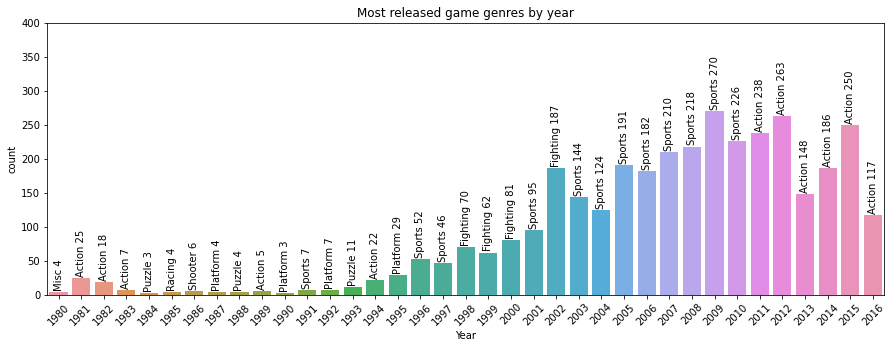

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation = 45)
ax = sns.barplot(x='Year', y='Max', data=df_genre_year_max)
plt.title('Most released game genres by year')
plt.ylim(0,400)
plt.ylabel('count')
idx = 0
for value in df_genre_year_max['Max']:
    ax.text(x=idx, y=value + 5, s=str(Genre[idx] + ' ' + str(value)),
            color='black', size=10, rotation=90, ha='center')
    idx += 1
plt.savefig('6_전체년도 최대 출시된 장르.png')

In [ ]:
#df_genre_year1 = df_genre_year.groupby(['Year'])['counts'].transform('max') == df_genre_year['counts']
#df_genre_year_max1 = df_genre_year[df_genre_year1].reset_index(drop=True)

In [ ]:
#df_genre_year_pv = df_genre_year.pivot('Year', 'Genre', 'counts').fillna(0)
#df_genre_year_pv = df_genre_year_pv.astype('int')
#df_genre_year_pv

In [ ]:
#df_genre_year_pv.head()

## 3-2 연도별 가장 많이 출시된 게임의 플랫폼 

In [ ]:
# 연도별 출시된 게임의 플랫폼 개수
df_platform_year = df_for_3.groupby(['Year', 'Platform']).size().reset_index()
df_platform_year.rename(columns = {0:'counts'}, inplace=True)
df_platform_year

In [ ]:
df_max1 = df_platform_year.groupby('Year')['counts'].transform('max')
df_max1 

In [ ]:
df_platform_year['Max'] = df_max1 
df_platform_year

In [ ]:
df_platform_year['compare'] = df_platform_year['counts'] == df_platform_year['Max']
df_platform_year_max = df_platform_year[df_platform_year['compare']==True]
df_platform_year_max = df_platform_year_max.loc[:, ['Year', 'Platform', 'Max']]
df_platform_year_max.reset_index(inplace=True)

In [ ]:
Platform = df_platform_year_max['Platform']
df_platform_year_max

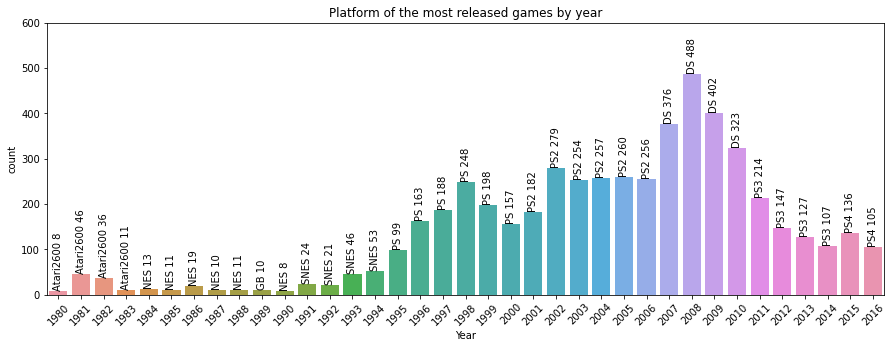

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation = 45)
ax = sns.barplot(x='Year', y='Max', data=df_platform_year_max)
plt.title('Platform of the most released games by year')
plt.ylim(0,600)
plt.ylabel('count')
idx = 0
for value in df_platform_year_max['Max']:
    ax.text(x=idx, y=value + 5, s=str(Platform[idx] + ' ' + str(value)),
            color='black', size=10, rotation=90, ha='center')
    idx += 1
plt.savefig('7_전체년도 최대 출시된 플랫폼.png')

## 3-3 연도별 최대 출고액을 기록한 게임의 장르와 플랫폼 

In [ ]:
df_for_3.info()

In [ ]:
df_sales_year = df_for_3.groupby(['Year', 'Genre', 'Platform'])['Grobal_Sales'].sum()
df_sales_year = pd.DataFrame(df_sales_year)

In [ ]:
df_sales_year

In [ ]:
df_max2 = df_sales_year.groupby('Year')['Grobal_Sales'].transform('max')
df_max2 

In [ ]:
df_sales_year['Max_G_sales'] = df_max2
df_sales_year

In [ ]:
df_sales_year['compare'] = df_sales_year['Grobal_Sales'] == df_sales_year['Max_G_sales']
df_sales_year_max = df_sales_year[df_sales_year['compare']==True]
df_sales_year_max.reset_index(inplace=True)

In [ ]:
df_sales_year_max
df_sales_year_max = df_sales_year_max.loc[:, ['Year','Genre','Platform','Max_G_sales']]

In [ ]:
df_sales_year_max

In [ ]:
Genre = df_sales_year_max['Genre']
Platform = df_sales_year_max['Platform']

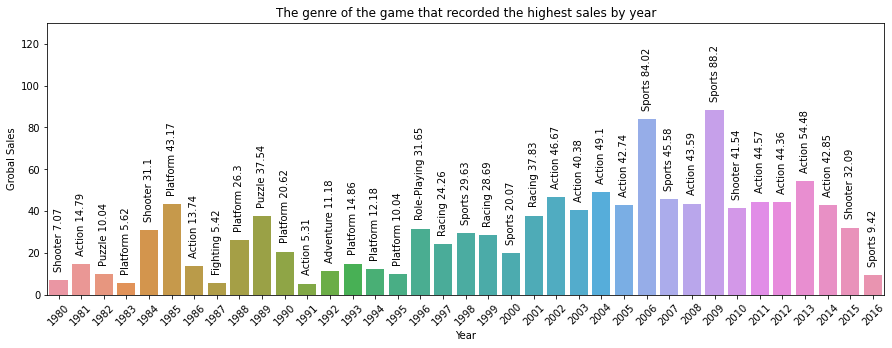

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation = 45)
ax = sns.barplot(x='Year', y='Max_G_sales', data=df_sales_year_max)
plt.title('The genre of the game that recorded the highest sales by year')
plt.ylim(0,130)
plt.ylabel('Grobal Sales')
idx = 0
for value in df_sales_year_max['Max_G_sales']:
    ax.text(x=idx, y=value + 5, s=str(Genre[idx] + ' ' + str(round(value,2))),
            color='black', size=10, rotation=90, ha='center')
    idx += 1
plt.savefig('8_연도별 최대 출고액을 기록한 장르.png')

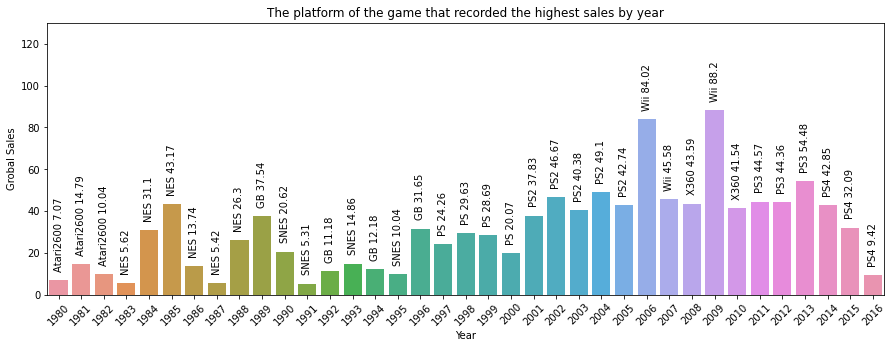

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation = 45)
ax = sns.barplot(x='Year', y='Max_G_sales', data=df_sales_year_max)
plt.title('The platform of the game that recorded the highest sales by year')
plt.ylim(0,130)
plt.ylabel('Grobal Sales')
idx = 0
for value in df_sales_year_max['Max_G_sales']:
    ax.text(x=idx, y=value + 5, s=str(Platform[idx] + ' ' + str(round(value,2))),
            color='black', size=10, rotation=90, ha='center')
    idx += 1
plt.savefig('9_연도별 최대 출고액을 기록한 플랫폼.png')

## 3-4 연도별 장르의 출고량 추이

In [ ]:
df['Grobal_Sales'].sort_values(ascending=False)

2908     82.74
4199     40.24
12579    35.83
3352     33.00
7829     31.38
         ...  
2890      0.01
13775     0.01
11517     0.01
12160     0.01
5598      0.00
Name: Grobal_Sales, Length: 16151, dtype: float64

In [ ]:
df["Genre"].value_counts()

Action          3228
Sports          2290
Misc            1671
Role-Playing    1455
Shooter         1269
Adventure       1265
Racing          1211
Platform         867
Simulation       840
Fighting         831
Strategy         666
Puzzle           558
Name: Genre, dtype: int64

In [ ]:
df_Genre_Sales = df[(df['Genre'] == 'Action')|(df['Genre'] == 'Sports')|(df['Genre'] == 'Misc')|(df['Genre'] == 'Role-Playing')|
                    (df['Genre'] == 'Shooter')|(df['Genre'] == 'Racing ')|(df['Genre'] == 'Adventure')]
df_Genre_Sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Grobal_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00,0.14
...,...,...,...,...,...,...,...,...,...,...
16591,Madden NFL 2005,PS2,2004,Sports,Electronic Arts,4.18,0.26,0.01,0.08,4.53
16592,Minna no Chizu 2,PSP,2007,Misc,Zenrin,0.00,0.00,0.02,0.00,0.02
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79


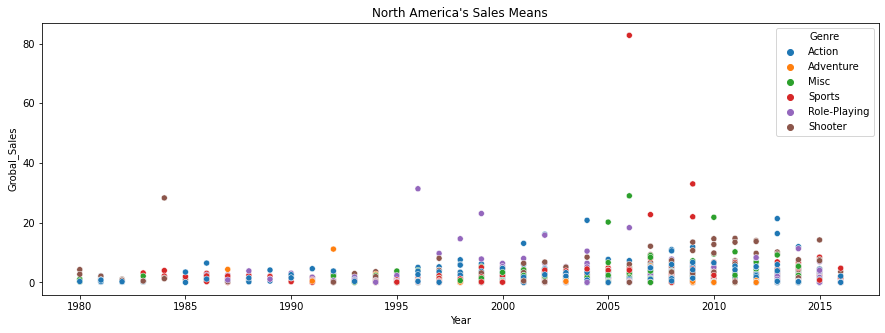

In [ ]:
plt.figure(figsize=(15,5))
plt.title("North America's Sales Means")
#plt.ylim([0, 10])   
sns.scatterplot(data=df_Genre_Sales, x='Year', y='Grobal_Sales' ,hue='Genre')

# 4. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

## 4-1 휴대용과 가정용 게임 플랫폼 구분

In [ ]:
df_for_4 = df_for_3

In [ ]:
df_for_4['Platform'].unique() 

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', 'Atari2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'NG'], dtype=object)

In [ ]:
platform_01 = df_for_4['Platform']

In [ ]:
platform_01 = pd.DataFrame(platform_01)

In [ ]:
platform_01['Platform'] = platform_01['Platform'].replace(['DS', 'PSP', 'GBA', '3DS', 'PSV','SAT','GB'],1)

In [ ]:
platform_01['Platform'] = platform_01['Platform'].replace(['Wii', 'PS3', 'PC', 'PS', 'PS4', 'PS2', 'XB',
       'X360', 'GC', 'Atari2600', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'GEN', 'NG'],0)

In [ ]:
# 휴대용 게임은 1, 가정용 게임은 0으로 표시
df_for_4['Platform_num'] = platform_01

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_for_4

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Grobal_Sales,Platform_num
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,1
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,1
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,1
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,0
...,...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,0
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,1
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,0
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38,1


In [ ]:
portable = df_for_4['Platform_num']

In [ ]:
portable = pd.DataFrame(portable)
portable

,Platform_num
0,1
1,0
2,1
3,1
4,0
...,...
16593,0
16594,1
16595,0
16596,1


In [ ]:
portable['type'] = df_for_4['Platform_num'].replace({1: 'Portable',0:'Home'})

In [ ]:
portable

,Platform_num,type
0,1,Portable
1,0,Home
2,1,Portable
3,1,Portable
4,0,Home
...,...,...
16593,0,Home
16594,1,Portable
16595,0,Home
16596,1,Portable


In [ ]:
df_for_4['Type'] = portable['type']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_for_4

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Grobal_Sales,Platform_num,Type
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,1,Portable
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,0,Home
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,1,Portable
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,1,Portable
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,0,Home
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,0,Home
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,1,Portable
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,0,Home
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38,1,Portable


In [ ]:
df_portable = df_for_4[df_for_4['Platform_num']==1]
df_portable.reset_index()

,index,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Grobal_Sales,Platform_num,Type
0,0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,1,Portable
1,2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,1,Portable
2,3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,1,Portable
3,5,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00,0.14,1,Portable
4,7,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0.00,0.11,0.01,0.19,1,Portable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5236,16580,Captain Morgane and the Golden Turtle,DS,2012,Adventure,Reef Entertainment,0.00,0.03,0.00,0.00,0.03,1,Portable
5237,16584,Bionicle Heroes,DS,2006,Shooter,Eidos Interactive,0.06,0.00,0.00,0.00,0.06,1,Portable
5238,16592,Minna no Chizu 2,PSP,2007,Misc,Zenrin,0.00,0.00,0.02,0.00,0.02,1,Portable
5239,16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,1,Portable


In [ ]:
df_home = df_for_4[df_for_4['Platform_num']==0]
df_home.reset_index()

,index,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Grobal_Sales,Platform_num,Type
0,1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,0,Home
1,4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,0,Home
2,6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00,0.03,0,Home
3,8,Imabikisou,PS3,2007,Adventure,Sega,0.00,0.00,0.04,0.00,0.04,0,Home
4,9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01,0.08,0,Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10886,16590,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010,Adventure,Aqua Plus,0.00,0.00,0.05,0.00,0.05,0,Home
10887,16591,Madden NFL 2005,PS2,2004,Sports,Electronic Arts,4.18,0.26,0.01,0.08,4.53,0,Home
10888,16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,0,Home
10889,16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,0,Home


## 4-2 전체년도 출고량이 높은 게임

In [ ]:
# 전세게 출고량 top5
df_top5_G = df_for_4.nlargest(5, 'Grobal_Sales')
df_top5_G

In [ ]:
Type = df_top5_G['Type']
plt.figure(figsize=(10, 5))
plt.xticks(rotation = 45)
sns.barplot(x='Name', y='Grobal_Sales', data=df_top5_G)
plt.title("World's best-selling games Top5")
plt.ylabel('Grobal Sales')
plt.savefig('10_전체년도 최대 출고액을 기록한 게임 top5.pdf')

In [ ]:
# 북미 출고량 top5
df_top5_NA = df_for_4.nlargest(5, 'NA_Sales')
print(df_top5_NA)
plt.figure(figsize=(10, 5))
plt.xticks(rotation = 45)
sns.barplot(x='Name', y='NA_Sales', data=df_top5_NA)
plt.title("North America's best-selling games Top5")
plt.ylabel('North America Sales')
plt.savefig('11_전체년도 북미 최대 출고액을 기록한 게임 top5.png')

In [ ]:
# 유럽 출고량 top5
df_top5_EU = df_for_4.nlargest(5, 'EU_Sales')
print(df_top5_EU)
plt.figure(figsize=(10, 5))
plt.xticks(rotation = 45)
sns.barplot(x='Name', y='EU_Sales', data=df_top5_EU)
plt.title("EU's best-selling games Top5")
plt.ylabel('EU Sales')
plt.savefig('12_전체년도 유럽 최대 출고액을 기록한 게임 top5.png')

In [ ]:
# 일본 출고량 top5
df_top5_JP = df_for_4.nlargest(5, 'JP_Sales')
print(df_top5_JP)
plt.figure(figsize=(10, 5))
plt.xticks(rotation = 45)
sns.barplot(x='Name', y='JP_Sales', data=df_top5_JP)
plt.title("Japen's best-selling games Top5")
plt.ylabel('Japen Sales')
plt.savefig('13_전체년도 일본 최대 출고액을 기록한 게임 top5.png')

In [ ]:
# 그 외 국가들 출고량 top5
df_top5_Other = df_for_4.nlargest(5, 'Other_Sales')
print(df_top5_Other)
plt.figure(figsize=(10, 5))
plt.xticks(rotation = 45)
sns.barplot(x='Name', y='Other_Sales', data=df_top5_Other)
plt.title("Top 5 games with high shipments in other countries")
plt.ylabel('other countries Sales')
plt.savefig('14_전체년도 그 외 국가들 최대 출고액을 기록한 게임 top5.png')

## 4-3 최근 10년간 출고액이 높은 게임

In [ ]:
df_10_years = df_for_4[(2007 <= df_for_4['Year']) & (df_for_4['Year']<= 2016)]

In [ ]:
df_10_years['Year'].unique()

In [ ]:
top5_G_10y= df_10_years.nlargest(7, 'Grobal_Sales')

top5_G_10y

In [ ]:
# 최근 10년간 전세계 출고량 top7 게임
top5_G_10y = df_10_years.nlargest(7, 'Grobal_Sales')

print(top5_G_10y)
plt.figure(figsize=(10, 5))
plt.title("Top 7 games shipped worldwide in the last 10 years")
plt.xticks(rotation = 45)
sns.barplot(x='Name', y='Grobal_Sales', data=top5_G_10y)
plt.ylabel('Grobal Sales')
plt.savefig('15_최근 10년간 전세계 출고액 top7 게임.png')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


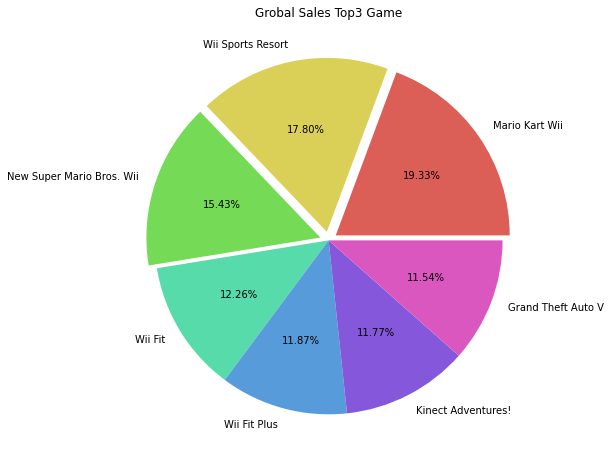

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(8,8)) 
fig.set_facecolor('white') 
plt.title("Grobal Sales Top3 Game")
ax = fig.add_subplot() 
colors = sns.color_palette('hls',len(top5_G_10y['Name']))
explode = [0.05,0.05,0.05,0,0,0,0]
ax.pie(x=top5_G_10y['Grobal_Sales'],labels=top5_G_10y['Name'],
       colors = colors, explode = explode, autopct=lambda p : '{:.2f}%'.format(p)) 
plt.show()
plt.savefig('16_최근 10년간 전세계 출고액 top3 게임 pie.png')

In [ ]:
# 최근 10년간 북미 출고량 top5
top7_NA_10y = df_10_years.nlargest(7, 'NA_Sales')

print(top7_NA_10y)
plt.figure(figsize=(10, 5))
plt.title("Top 7 games shipped NA in the last 10 years")
plt.xticks(rotation = 45)
sns.barplot(x='Name', y='NA_Sales', data=top7_NA_10y)
plt.ylabel('North America Sales')
plt.savefig('17_최근 10년간 북미 출고액 top7 게임.png')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


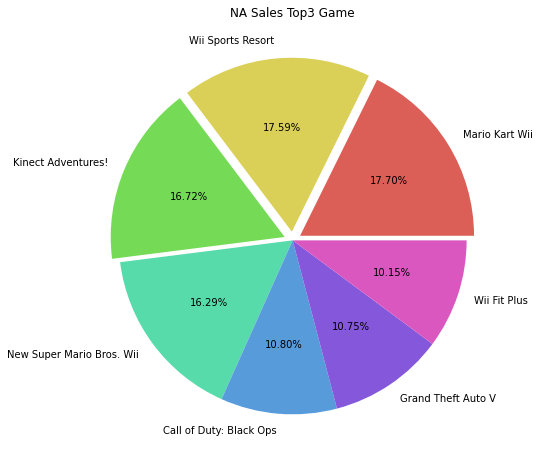

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(8,8)) 
fig.set_facecolor('white') 
plt.title("NA Sales Top3 Game")
ax = fig.add_subplot() 
colors = sns.color_palette('hls',len(top7_NA_10y['Name']))
explode = [0.05,0.05,0.05,0,0,0,0]
ax.pie(x=top7_NA_10y['NA_Sales'],labels=top7_NA_10y['Name'],
       colors = colors, explode = explode, autopct=lambda p : '{:.2f}%'.format(p)) 
plt.show()
plt.savefig('18_최근 10년간 북미 출고액 top3 게임 pie.png')

In [ ]:
# 최근 10년간 유럽 출고량 top5
top7_EU_10y = df_10_years.nlargest(7, 'EU_Sales')

print(top7_EU_10y)
plt.figure(figsize=(10, 5))
plt.title("Top 7 games shipped EU in the last 10 years")
plt.xticks(rotation = 45)
sns.barplot(x='Name', y='EU_Sales', data=top7_EU_10y)
plt.ylabel('EU Sales')
plt.savefig('19_최근 10년간 유럽 출고액 top7 게임.png')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


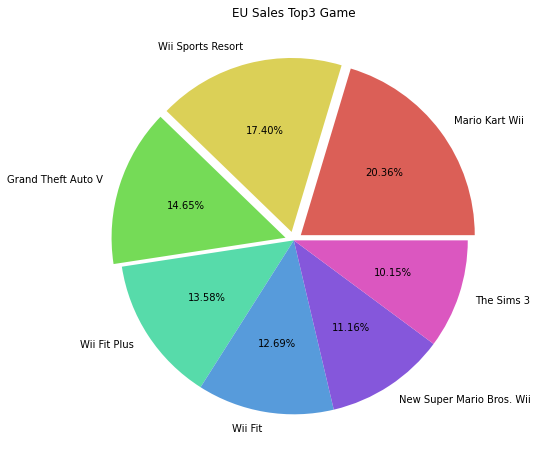

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(8,8)) 
fig.set_facecolor('white') 
plt.title("EU Sales Top3 Game")
ax = fig.add_subplot() 
colors = sns.color_palette('hls',len(top7_EU_10y['Name']))
explode = [0.05,0.05,0.05,0,0,0,0]
ax.pie(x=top7_EU_10y['EU_Sales'],labels=top7_EU_10y['Name'],
       colors = colors, explode = explode, autopct=lambda p : '{:.2f}%'.format(p)) 
plt.show()
plt.savefig('20_최근 10년간 유럽 출고액 top3 게임 pie.png')

In [ ]:
# 최근 10년간 일본 출고량 top7
top7_JP_10y = df_10_years.nlargest(7, 'JP_Sales')

print(top7_JP_10y)
plt.figure(figsize=(10, 5))
plt.title("Top 7 games shipped Japen in the last 10 years")
plt.xticks(rotation = 45)
sns.barplot(x='Name', y='JP_Sales', data=top7_JP_10y)
plt.ylabel('Japen Sales')
plt.savefig('21_최근 10년간 일본 출고액 top7 게임.png')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


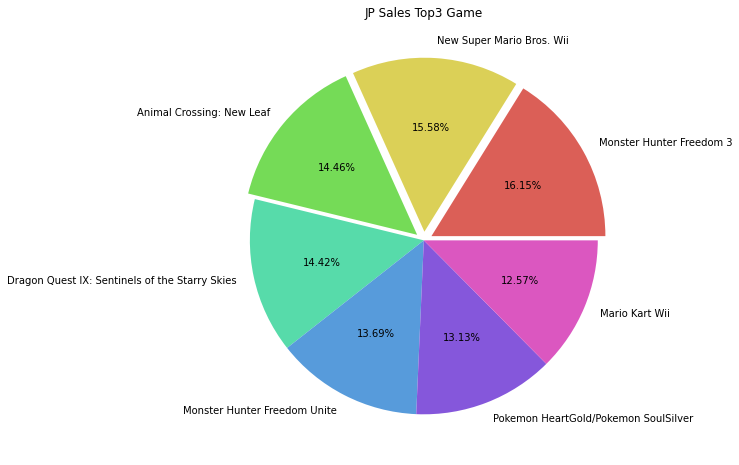

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(8,8)) 
fig.set_facecolor('white') 
plt.title("JP Sales Top3 Game")
ax = fig.add_subplot() 
colors = sns.color_palette('hls',len(top7_JP_10y['Name']))
explode = [0.05,0.05,0.05,0,0,0,0]
ax.pie(x=top7_JP_10y['JP_Sales'],labels=top7_JP_10y['Name'],
       colors = colors, explode = explode, autopct=lambda p : '{:.2f}%'.format(p)) 
plt.show()
plt.savefig('22_최근 10년간 일본 출고액 top3 게임 pie.png')

In [ ]:
# 최근 10년간 그 외 국가 출고량 top7
top7_Other_10y = df_10_years.nlargest(7, 'Other_Sales')

print(top7_Other_10y)
plt.figure(figsize=(10, 5))
plt.title("Top 7 games shipped Other countries in the last 10 years")
plt.xticks(rotation = 45)
sns.barplot(x='Name', y='Other_Sales', data=top7_Other_10y)
plt.ylabel('Other countries Sales')
plt.savefig('23_최근 10년간 그 외 국가들 출고액 top7 게임.png')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


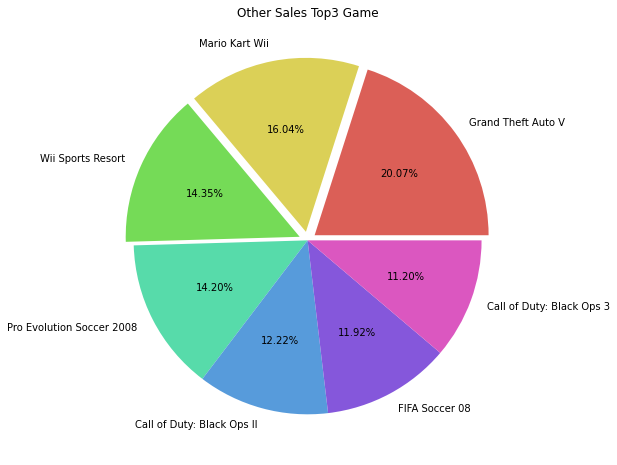

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(8,8)) 
fig.set_facecolor('white') 
plt.title("Other Sales Top3 Game")
ax = fig.add_subplot() 
colors = sns.color_palette('hls',len(top7_Other_10y['Name']))
explode = [0.05,0.05,0.05,0,0,0,0]
ax.pie(x=top7_Other_10y['Other_Sales'],labels=top7_Other_10y['Name'],
       colors = colors, explode = explode, autopct=lambda p : '{:.2f}%'.format(p)) 
plt.show()
plt.savefig('24_최근 10년간 그 외 국가들 출고액 top3 게임 pie.png')

# 5. 최근 10년간 휴대용과 가정용 게임 플랫폼의 출고액 차이

## 5-1 가설검정

### 귀무가설 : 휴대용 게임의 평균 출고액 $\leq$ 가정용 게임의 평균 출고액
### 대립가설 : 휴대용 게임의 평균 출고액 $\gt$ 가정용 게임의 평균 출고액

In [ ]:
df_10_years.info()

In [ ]:
# 기술통계확인
df_10_years.groupby('Platform_num')['Grobal_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Platform_num,,,,,,,,
0,5546.0,0.611913,1.528681,0.00,0.07,0.2,0.58,35.83
1,3560.0,0.282854,0.724033,0.01,0.04,0.1,0.25,12.21


In [ ]:
import random
np.random.seed(2)

mean_pop = df_10_years['Grobal_Sales'].mean()
mean_pop

0.4832670766527564

In [ ]:
np.random.seed(2)

portable_means = []
home_means = []
diff_means = []

for i in range(10000) :
    sample = df_10_years.sample(df_10_years.shape[0], replace=True)

    portable_mean = sample[sample.Platform_num == 1]['Grobal_Sales'].mean()
    portable_means.append(portable_mean)

    home_mean = sample[sample.Platform_num == 0]['Grobal_Sales'].mean()
    home_means.append(home_mean)

    diff_means.append(portable_mean - home_mean)



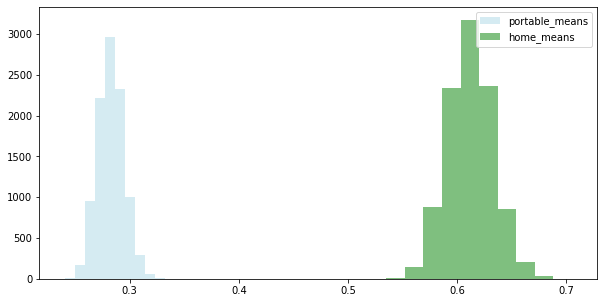

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(portable_means, color = 'lightblue', alpha = 0.5)
plt.hist(home_means, color = 'green', alpha = 0.5)
plt.legend(('portable_means', 'home_means'), loc='upper right')

In [ ]:
sample_diff_mean = df_10_years[df_10_years.Platform_num == 1]['Grobal_Sales'].mean() - df_10_years[df_10_years.Platform_num == 0]['Grobal_Sales'].mean()
sample_diff_mean

-0.3290591579314173

In [ ]:
sample_diff_std = np.std(diff_means)
sample_diff_std

0.023925406458374956

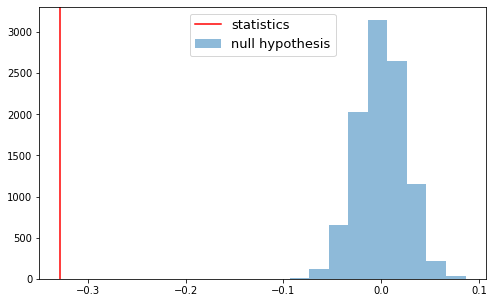

In [ ]:
plt.figure(figsize=(8,5))
null_vals = np.random.normal(0, sample_diff_std, 10000) 
plt.hist(null_vals, alpha=0.5, label='null hypothesis')
plt.axvline(sample_diff_mean, color='r', label='statistics')
plt.legend(loc=9, fontsize=13)
plt.show()

In [ ]:
p_value = (null_vals > sample_diff_mean).mean()
print(f'p value = {p_value} 이므로 귀무가설을 기각하지 못한다.\n 따라서 휴대용보다 가정용 플랫폼의 전세계 출고액이 크다.')

p value = 1.0 이므로 귀무가설을 기각하지 못한다.
 따라서 휴대용보다 가정용 플랫폼의 전세계 출고액이 크다.


## 5-2 시각화로 확인하기

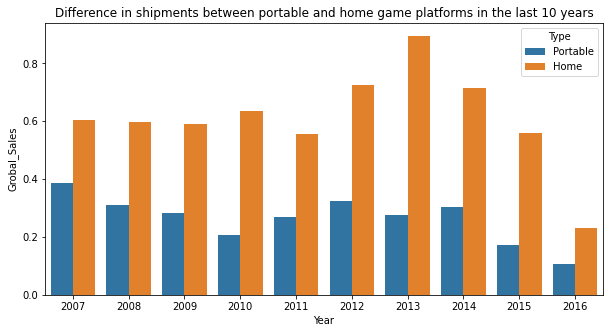

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Difference in shipments between portable and home game platforms in the last 10 years')
sns.barplot(x='Year', y='Grobal_Sales', hue='Type', ci=None, data=df_10_years)
plt.savefig('24_최근 10년간 휴대용, 가정용 플랫폼의 출고액 차이bar.png')

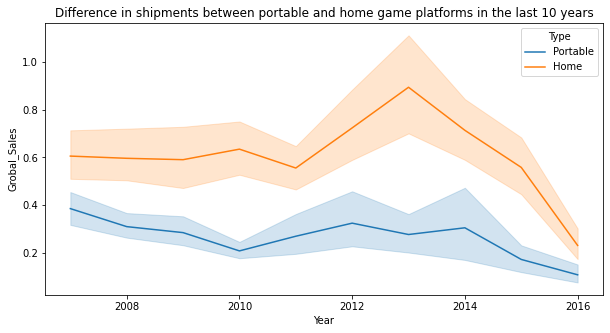

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Difference in shipments between portable and home game platforms in the last 10 years')
sns.lineplot(x='Year', y='Grobal_Sales', hue='Type', data=df_10_years)
plt.savefig('25_최근 10년간 휴대용, 가정용 플랫폼의 출고액 차이line.png')